## CHIPOTLE'S DATA

#### Getting to know your data

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd

# Import the dataset
data = '../data/chipotle.tsv'

# Assign it to a variable called chipo
chipo = pd.read_csv(data, sep='\t')

# See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
# What is the number of observations in the dataset?
print('\nTotal Observations: ', chipo.shape[0])

# What is the number of columns in the dataset
print('\nTotal Columns: ', chipo.shape[1])

# Print the name of all the colums
print('\n', chipo.columns)

# How is the dataset indexed?
print('\n', chipo.index)

# Which was the most-ordered item?
items = chipo[['item_name']].value_counts()
most_ordered = items.head(1)
print('\n Most Ordered: ', most_ordered.index)

# For the most ordered item, how many items were ordered?
print('\n Qty Ordered: ', most_ordered.iloc[0])

# What is the most ordered item in the choice_descriptionn column?
items_by_choice_des = chipo[['choice_description']].value_counts()
top_items_by_choice_des = items_by_choice_des.head(1)
print('\n Top Item by Description: ', top_items_by_choice_des)

# How many items were ordered in total?
total_items = items.agg({'sum'})
print('\n Total Items: ', total_items)


Total Observations:  4622

Total Columns:  5

 Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

 RangeIndex(start=0, stop=4622, step=1)

 Most Ordered:  MultiIndex([('Chicken Bowl',)],
           names=['item_name'])

 Qty Ordered:  726

 Top Item by Description:  choice_description
[Diet Coke]           134
Name: count, dtype: int64

 Total Items:  sum    4622
Name: count, dtype: int64


In [4]:
# Turn the item price into a float
item_price = chipo['item_price'].dtype

# Check the item price type
print(item_price)

# Check the item price type
chipo['item_price'].dtype

# How much was the revenue for the period in the dataset?
chipo['item_price'] = chipo['item_price'].str.strip('$')
chipo['total'] = chipo['quantity'] * chipo['item_price'].astype('float') # Total=Qty x Price
total_revenue = chipo['total'].sum()
print('\nTotal Revenue ($):', total_revenue)

# How many orders were made in the period?
total_orders = chipo['order_id'].value_counts().count()
print('\nTotal Orders:', total_orders)

# What is the average revenue amount per order?
average_revenue = total_revenue / total_orders
print('\nAverage Revenue per Order:', average_revenue.mean())

# How many different items are sold?
num_of_items_sold = chipo['item_name'].value_counts().count()
print('\nNumber of Items Sold:', num_of_items_sold)

object

Total Revenue ($): 39237.02

Total Orders: 1834

Average Revenue per Order: 21.39423118865867

Number of Items Sold: 50


#### Filtering and Sorting

In [5]:
# How many products cost more than $10.00?

## delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity'])

## select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered['quantity'] == 1]

## filter item prices greater than $10
price_more_than_10_usd = chipo_one_prod[chipo_one_prod['item_price'] > '10.00']

# number of item after filtering
qty_of_products = price_more_than_10_usd['item_name'].count()

print('Quantity of product above $10.00:', qty_of_products)

Quantity of product above $10.00: 46


In [6]:
# What is the price for each item sorted by less expensive?
item_price = price_more_than_10_usd[['item_name','item_price']]
item_price.sort_values('item_price')

,item_name,item_price
250,Chicken Salad,10.98
5,Chicken Bowl,10.98
186,Veggie Salad Bowl,11.25
62,Veggie Bowl,11.25
57,Veggie Burrito,11.25
738,Veggie Soft Tacos,11.25
7,Steak Burrito,11.75
168,Barbacoa Crispy Tacos,11.75
39,Barbacoa Bowl,11.75
606,Steak Salad Bowl,11.89


In [7]:
# Sot by the name of the items
chipo.sort_values('item_name')

,order_id,quantity,item_name,choice_description,item_price,total
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
...,...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75,8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25


In [8]:
# What is the quantity of the most expensive item ordered?

## filter items by price starting from the highest
price_list_of_items = chipo[['item_name', 'item_price']].sort_values('item_price', ascending=False)

## select item with most expesive price
most_expensive_item_name = price_list_of_items.iloc[0,0] #item_name
most_expensive_item_price = price_list_of_items.iloc[0,1] #item_price

print(f"Most expensive item is {most_expensive_item_name} with a price of ${most_expensive_item_price}")

Most expensive item is Steak Salad Bowl with a price of $9.39 


In [9]:
# How many times was a Veggie Salad Bowl ordered?

## filter items on each order
order_per_meal = chipo[['item_name','order_id']]

## filter out only veg salad bowls
veg_salad = order_per_meal[order_per_meal['item_name'] == 'Veggie Salad Bowl']

## count number of veg salad bowl
total_veg_salad = veg_salad['order_id'].count()

print('\nTotal Veggie Salad Bowl order:', total_veg_salad)

# OR

veg_order = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
len(veg_order)


Total Veggie Salad Bowl order: 18


18

In [10]:
# How many times did someone order more than one Canned Soda?

## filter out items, quantity ordered and order id
ordered_items = chipo[['order_id', 'item_name', 'quantity']]

## filter out Canned Soda only
canned_soda_only = ordered_items[ordered_items['item_name'] == 'Canned Soda']

## filter out when Canned Soda order is more than 1
more_than_one_canned_soda = canned_soda_only[canned_soda_only['quantity'] > 1]

## total Canned Soda more than 1
total_more_than_one_canned_soda = more_than_one_canned_soda['quantity'].count()

print('\nCanned Soda ordered more than once:', total_more_than_one_canned_soda)

# OR

multiple_canned_soda = chipo[(chipo['item_name'] == 'Canned Soda') & (chipo['quantity'] > 1)]
len(multiple_canned_soda)


Canned Soda ordered more than once: 20


20

#### Visualization

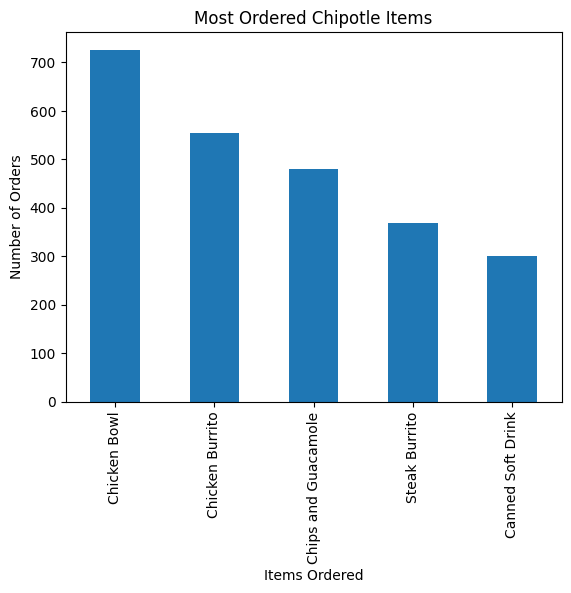

In [11]:
# Create a plot of the top 5 items bought

from matplotlib import pyplot as plt

top_5_items = chipo[['item_name', 'quantity']].value_counts('item_name').head(5)
top_5_items.plot(kind='bar')
plt.ylabel("Number of Orders")
plt.xlabel("Items Ordered")
plt.title("Most Ordered Chipotle Items")
plt.show()

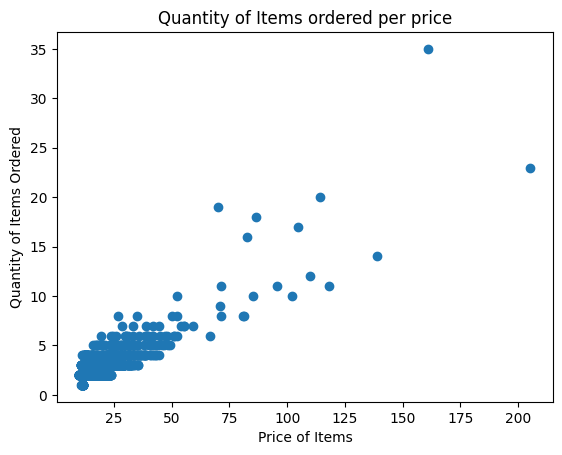

In [45]:
# Create a scatterplot with the number of items ordered per order price
chipo['item_price'] = chipo['item_price'].astype('float')
orders = chipo.groupby('order_id').sum()

# Plot the scatterplot
plt.scatter(x=orders['item_price'], y=orders['quantity'])
plt.xlabel('Price of Items') # Set x label
plt.ylabel('Quantity of Items Ordered') # Set y label
plt.title('Quantity of Items ordered per price'); # Set plot title